In [1]:
import os
import re
import h5py
import random
import numpy as np
import pandas as pd
import scipy.io
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist, squareform

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

import utils

datadir = '../datasets/NNN/'
fnames = utils.fnames(datadir)
raster_data = pd.read_pickle('../datasets/NNN/all_raster_data_full.pkl')

[None 'MB1_3_B' 'MO2_21_O' 'Unknown_22_O' 'MB2_20_B' 'Unknown_11_O'
 'Unknown_20_B' 'MO1s1_4_O' 'Unknown_4_O' 'Unknown_6_B' 'MB2_21_B'
 'LPP4_1_O' 'Unknown_19_F' 'LPP1_2_O' 'Unknown_9_B' 'MF1_9_F'
 'Unknown_23_B' 'MB1_8_B' 'MF1_8_F' 'Unknown_15_O' 'AF3_18_F' 'AB3_18_B'
 'CLC3_13_O' 'Unknown_14_O' 'AO2_24_O' 'PITP4_10_O' 'MB3_12_B'
 'Unknown_6_O' 'MF1_7_F' 'MO1s2_5_O' 'Unknown_5_F' 'AB3_12_B'
 'Unknown_16_O' 'AB3_17_B' 'Unknown_26_O' 'Unknown_27_B' 'AO5_25_O'
 'AMC3_28_F']


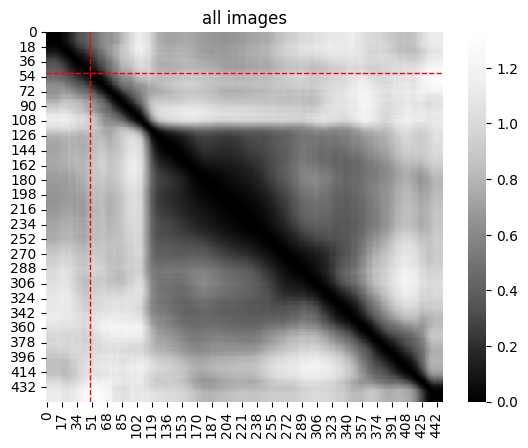

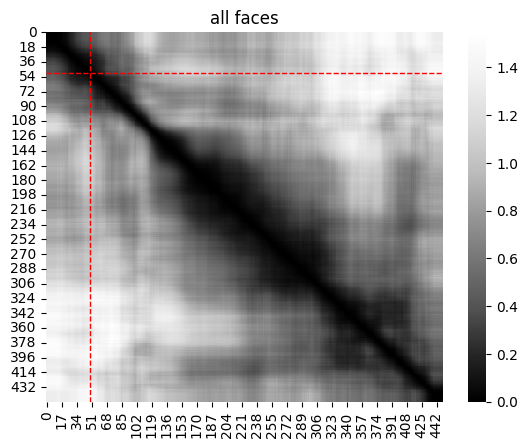

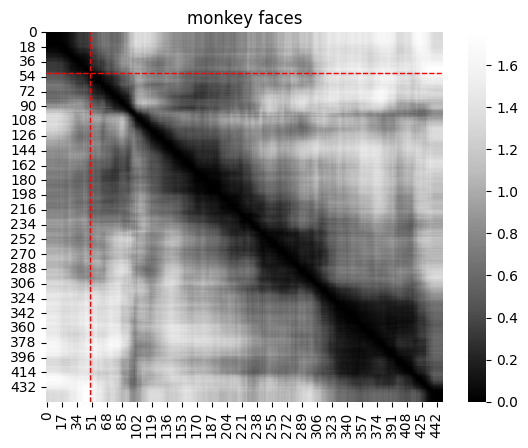

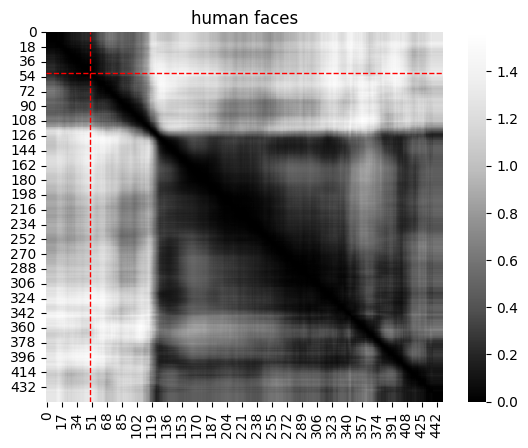

In [6]:
img_sets = {'all images': np.arange(1000,1072), 
           'all faces': np.arange(1000,1025),
           'monkey faces': np.arange(1000,1015),
           'human faces': np.arange(1015,1025)}

metric = 'correlation'
roi = 'AF3_18_F' #'MF1_9_F'
roi_data = raster_data[(raster_data['roi']==roi)]
stacked = np.stack(roi_data['img_psth'])

for k,v in img_sets.items():
    substacked = stacked[:, :, v]
    averaged = np.mean(substacked, axis=0)
    
    fig,ax = plt.subplots(1,1)

    rdm = squareform(pdist(averaged, metric=metric))
    sns.heatmap(rdm, cmap=sns.color_palette('Greys_r', as_cmap=True))
    ax.set_title(f'{k}')

    ax.axvline(x=50, color='red', linestyle='--', linewidth=1)
    ax.axhline(y=50, color='red', linestyle='--', linewidth=1)
    plt.show()